# Listening Analysis

Combining Spotify & Last.fm data for exploring habits and trends
Uses two data sources,

1. Last.fm scrobbles
2. Spotify audio features

The two are joined by searching Last.fm tracks on Spotify to get a Uri, the track name and artist name are provided for the query.
These Uris can be used to retrieve Spotify feature descriptors. `all_joined()` gets a BigQuery of that joins the scrobble time series with their audio features and provides this as a panda frame.

In [3]:
scrobbles.dtypes

track                object
album                object
artist               object
uri                  object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

In [4]:
scrobbles.describe()[1:]

acousticness  danceability   duration_ms    energy  instrumentalness  \
mean      0.170649      0.589141  2.422924e+05  0.711968          0.213591   
std       0.246679      0.173905  1.220714e+05  0.204289          0.335353   
min       0.000000      0.000000  1.578700e+04  0.000000          0.000000   
25%       0.004320      0.470000  1.893220e+05  0.586000          0.000000   
50%       0.045500      0.599000  2.264410e+05  0.749000          0.001100   
75%       0.237000      0.724000  2.787440e+05  0.878000          0.394000   
max       0.996000      0.981000  4.995315e+06  0.999000          0.995000   

            key  liveness   loudness      mode  speechiness       tempo  \
mean   5.328584  0.216903  -7.127309  0.581856     0.146982  124.640429   
std    3.673929  0.173524   3.646891  0.493257     0.136440   30.809049   
min    0.000000  0.000000 -60.000000  0.000000     0.000000    0.000000   
25%    2.000000  0.099900  -8.590000  0.000000     0.047500   97.805000   
50%    6.000000  0.141000  -6.472000  1.000000     0.080800  124.992000   
75%    9.000000  0.300000  -4.827000  1.000000     0.223000  143.188000   
max   11.000000  0.995000   3.108000  1.000000     0.966000  248.028000   

      time_signature   valence  
mean        3.957806  0.418024  
std         0.356726  0.236941  
min         0.000000  0.000000  
25%         4.000000  0.221000  
50%         4.000000  0.398000  
75%         4.000000  0.597000  
max         5.000000  0.983000

In [5]:
scrobbles.sort_index(ascending=False)

track  \
time                                                            
2020-12-31 18:35:28+00:00       Blackbird - Gorgon City Remix   
2020-12-31 18:28:13+00:00   Lanterns - Dead Man's Chest Remix   
2020-12-31 18:22:07+00:00             ID Check - Original Mix   
2020-12-31 17:52:23+00:00                           Up & Down   
2020-12-31 17:00:28+00:00                              Cuatro   
...                                                       ...   
2017-11-03 03:35:27+00:00                               Julia   
2017-11-03 03:28:51+00:00               Site Zero / The Vault   
2017-11-03 02:54:37+00:00  Reminder (feat. How To Dress Well)   
2017-11-03 02:50:23+00:00                             Monsoon   
2017-11-03 02:43:01+00:00                  Let Go (interlude)   

                                                                  album  \
time                                                                      
2020-12-31 18:35:28+00:00                                  Blackbird EP   
2020-12-31 18:28:13+00:00  Lanterns / Lanterns (Dead Man's Chest Remix)   
2020-12-31 18:22:07+00:00                           Toolroom Ibiza 2019   
2020-12-31 17:52:23+00:00                                    Emotion EP   
2020-12-31 17:00:28+00:00                                   Tomahawk EP   
...                                                                 ...   
2017-11-03 03:35:27+00:00                                          Void   
2017-11-03 03:28:51+00:00                                          Void   
2017-11-03 02:54:37+00:00                                          Void   
2017-11-03 02:50:23+00:00                                          Void   
2017-11-03 02:43:01+00:00                                          Void   

                                         artist  \
time                                              
2020-12-31 18:35:28+00:00                Joeski   
2020-12-31 18:28:13+00:00            Tim Reaper   
2020-12-31 18:22:07+00:00                 Ben A   
2020-12-31 17:52:23+00:00  Purple Disco Machine   
2020-12-31 17:00:28+00:00          Mystic State   
...                                         ...   
2017-11-03 03:35:27+00:00              RL Grime   
2017-11-03 03:28:51+00:00              RL Grime   
2017-11-03 02:54:37+00:00              RL Grime   
2017-11-03 02:50:23+00:00              RL Grime   
2017-11-03 02:43:01+00:00              RL Grime   

                                                            uri  acousticness  \
time                                                                            
2020-12-31 18:35:28+00:00  spotify:track:3eGyeq8R8PscX1d13c9eJP      0.000542   
2020-12-31 18:28:13+00:00  spotify:track:3lc7wN7T29s7uRbPZR0hTH      0.001530   
2020-12-31 18:22:07+00:00  spotify:track:4x94xmQhUnd59k8oGM7AkG      0.001720   
2020-12-31 17:52:23+00:00  spotify:track:11DRarpv190YnCAXt85uFA      0.032000   
2020-12-31 17:00:28+00:00  spotify:track:6JBKvAWsMvo68a9pMa9Ujn      0.040300   
...                                                         ...           ...   
2017-11-03 03:35:27+00:00  spotify:track:4or82pWT9zvQNIoGckZiYb      0.003340   
2017-11-03 03:28:51+00:00  spotify:track:762ME2OHjuGo4xTbfZhpok      0.683000   
2017-11-03 02:54:37+00:00  spotify:track:2JUdMBlA5JzuemLGzZNDrf      0.683000   
2017-11-03 02:50:23+00:00  spotify:track:0jYAtTuRsRdHMuvaOXIAj5      0.034600   
2017-11-03 02:43:01+00:00  spotify:track:39FvWuHBtYQTJNdisJxZIG      0.181000   

                           danceability  duration_ms  energy  \
time                                                           
2020-12-31 18:35:28+00:00         0.803       389834   0.857   
2020-12-31 18:28:13+00:00         0.537       440255   0.868   
2020-12-31 18:22:07+00:00         0.809       372614   0.982   
2020-12-31 17:52:23+00:00         0.758       409961   0.913   
2020-12-31 17:00:28+00:00         0.621       342866   0.680   
...                                 ...          ...     ...   
2017

# Listening Parameters Over Time

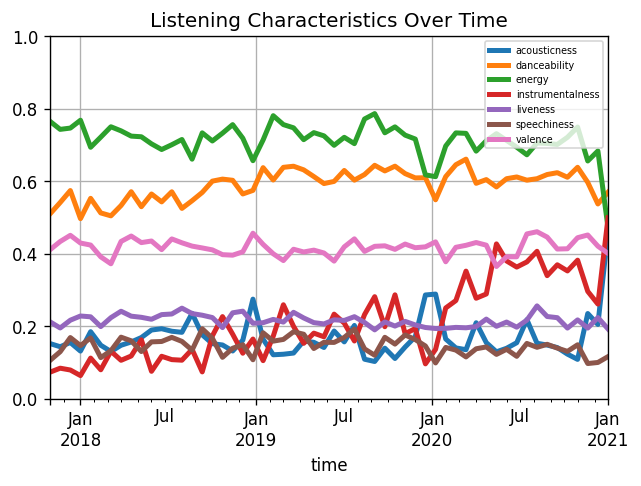

In [11]:
# select only descriptor float columns
filtered_scrobbles = scrobbles.loc[:, float_headers]
# resample by month and mean
filtered_scrobbles = filtered_scrobbles.resample("3W").mean()

# filtered_scrobbles["instrumentalness"].plot()
filtered_scrobbles.plot(linewidth=3)

plt.title(f'Listening Characteristics Over Time')
plt.legend(loc = "upper right", fontsize = "xx-small")
plt.ylim([0, 1])
plt.grid()
plt.show()

# Imports & Setup

In [1]:
from datetime import datetime

from google.cloud import bigquery
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

from analysis.net import get_spotnet, get_playlist, track_frame
from analysis.query import *
from analysis import float_headers, days_since

import numpy as np
import pandas as pd

client = bigquery.Client()
spotnet = get_spotnet()
cache = 'query.csv'
first_day = datetime(year=2017, month=11, day=3)

## Read Scrobble Frame

In [2]:
scrobbles = get_query(cache=cache)

## Write Scrobble Frame

In [3]:
scrobbles.reset_index().to_csv(cache, sep='\t')